11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 11s 1us/step


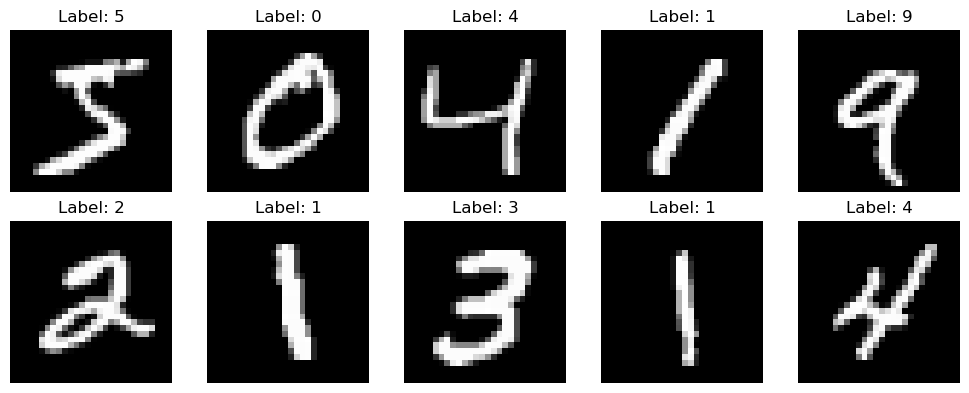

C:\Users\navya\anaconda3\anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8212 - loss: 0.6265 - val_accuracy: 0.9627 - val_loss: 0.1378
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9563 - loss: 0.1495 - val_accuracy: 0.9710 - val_loss: 0.0979
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9710 - loss: 0.0990 - val_accuracy: 0.9745 - val_loss: 0.0817
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9785 - loss: 0.0740 - val_accuracy: 0.9755 - val_loss: 0.0870
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9818 - loss: 0.0587 - val_accuracy: 0.9792 - val_loss: 0.0718
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9857 - loss: 0.0440 - val_accuracy: 0.9778 - val_loss: 0.0738
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9885 - loss: 0.0365 - val_accuracy: 0.9763 - val_loss: 0.0819
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9915 - loss: 0.0292 - val_accuracy: 0.

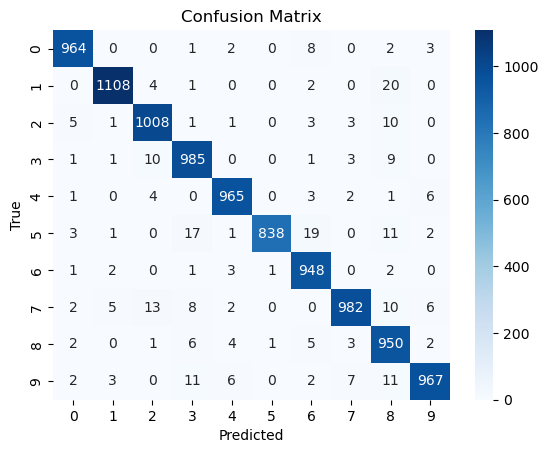

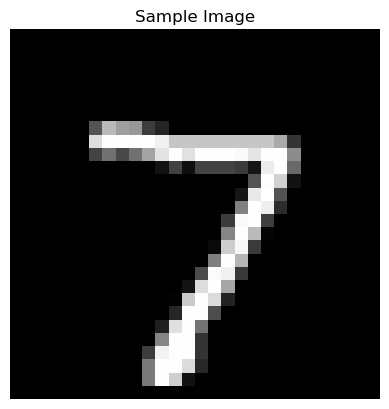

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Predicted digit: 7


In [1]:
# MNIST Digit Classification Project (Using Keras)

# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Step 2: Load the Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 3: Preprocess the Data
x_train = x_train / 255.0  # Normalize pixel values
x_test = x_test / 255.0

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Step 4: Visualize Sample Images
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Step 5: Build the Neural Network Model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Step 6: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 7: Train the Model
history = model.fit(x_train, y_train_cat, epochs=10, batch_size=128, validation_split=0.1)

# Step 8: Evaluate the Model
loss, accuracy = model.evaluate(x_test, y_test_cat)
print("\nTest Accuracy:", accuracy)

# Step 9: Classification Report & Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))

cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Step 10: Predict a Single Image
index = 0
sample_image = x_test[index]
sample_input = sample_image.reshape(1, 28, 28)
plt.imshow(sample_image, cmap='gray')
plt.title("Sample Image")
plt.axis('off')
plt.show()

prediction = model.predict(sample_input)
print("Predicted digit:", np.argmax(prediction))
